In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

# Import data from csv

In [2]:
df_train = pd.read_csv("training.csv")
df_test = pd.read_csv("testing.csv", delimiter=";")
df_train

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0
5,6,20000.0,1,1,2,40,0,0,0,16500.0,17012.0,18181.0,1281.0,1450.0,1600.0,0
6,7,200000.0,1,1,2,32,0,0,0,157222.0,160320.0,162140.0,7200.0,5888.0,5990.0,0
7,8,370000.0,1,1,2,37,0,0,0,47269.0,43531.0,59801.0,2000.0,20000.0,8000.0,0
8,9,160000.0,1,1,2,39,0,0,0,106643.0,89397.0,90348.0,3700.0,6353.0,1200.0,0
9,10,30000.0,1,1,2,36,1,2,2,25826.0,27274.0,25744.0,3000.0,0.0,3000.0,0


# Data exploratory

In [3]:
df_train.shape

(16625, 16)

In [4]:
print(df_train.info())
df_train.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB
None


ID           16625
LIMIT_BAL       76
MARRIAGE         3
EDUCATION        4
SEX              2
AGE             52
PAY_1            5
PAY_2            5
PAY_3            5
BILL_AMT1    13364
BILL_AMT2    13201
BILL_AMT3    12939
PAY_AMT1      5138
PAY_AMT2      5039
PAY_AMT3      4892
TARGET           2
dtype: int64

In [5]:
numerikal = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3','TARGET']
kategorikal = ['MARRIAGE','EDUCATION','SEX','PAY_1','PAY_2','PAY_3','TARGET']

In [6]:
df_train.isnull().sum()

ID           0
LIMIT_BAL    0
MARRIAGE     0
EDUCATION    0
SEX          0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
TARGET       0
dtype: int64

# Data visualizatoin

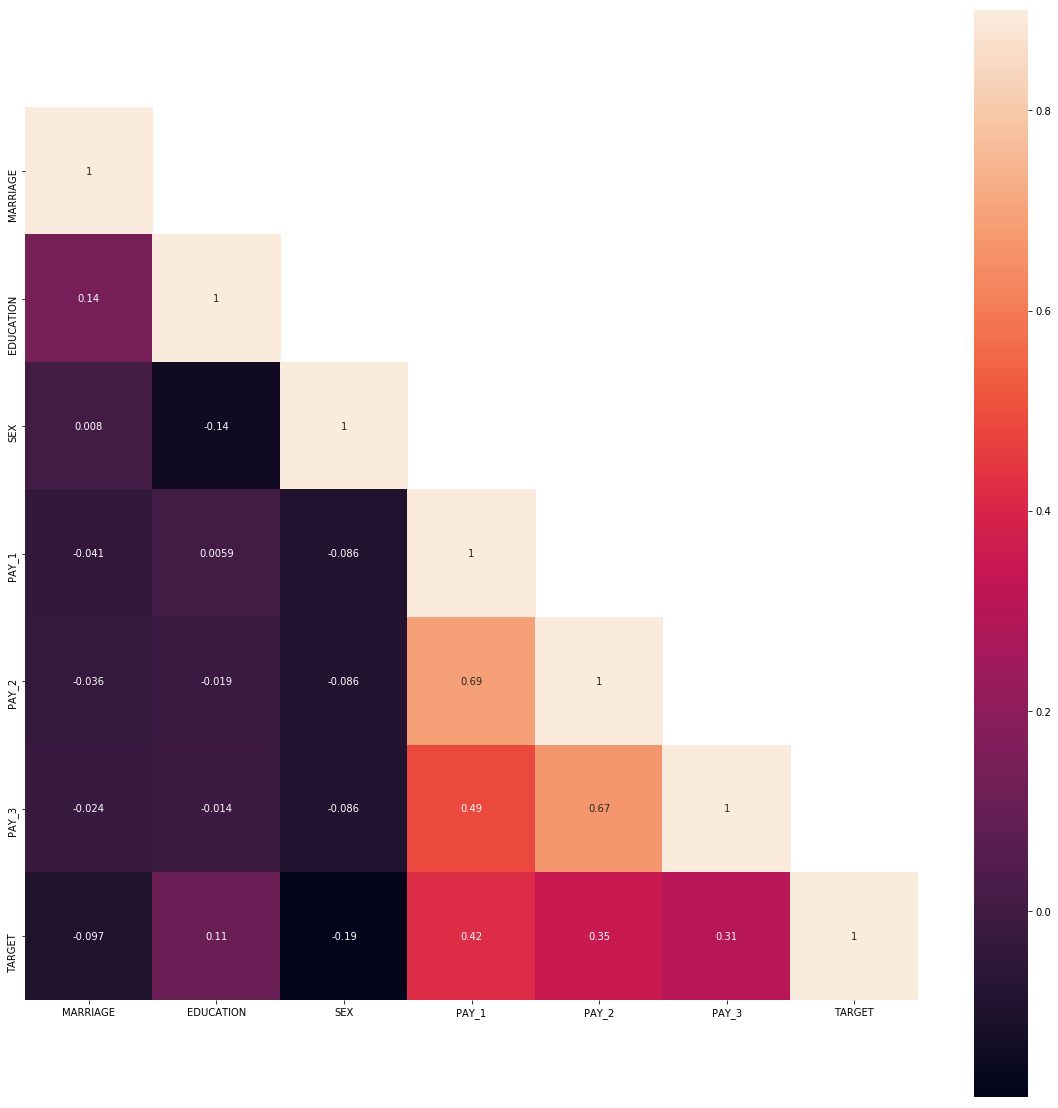

In [7]:
#create correlation with hitmap

#create correlation
#corr = df_train.corr(method = 'pearson')
corr = df_train[kategorikal].corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

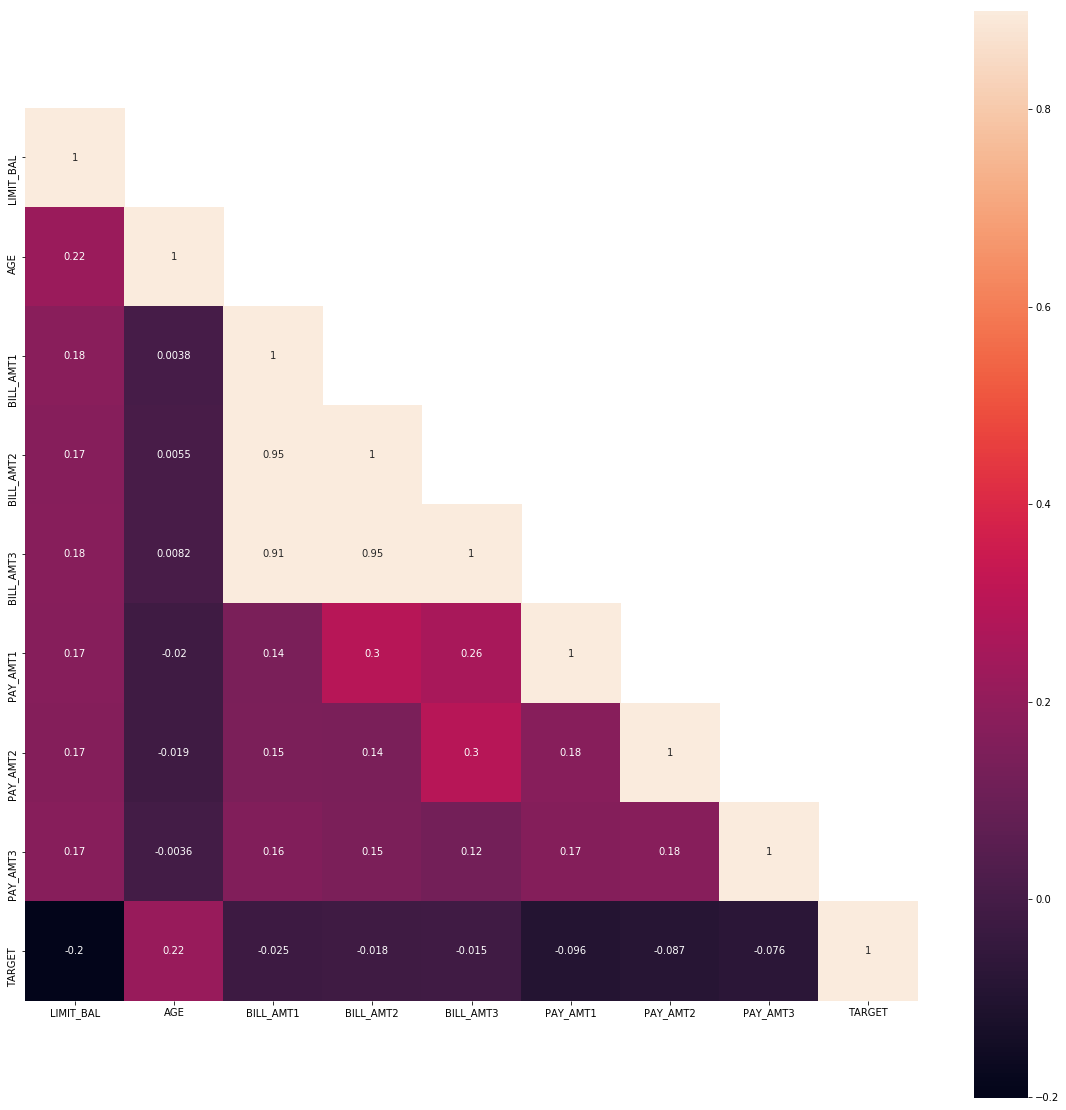

In [8]:
#create correlation with hitmap

#create correlation
corr = df_train[numerikal].corr(method = 'pearson')
#corr = df_train[kategorikal].corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

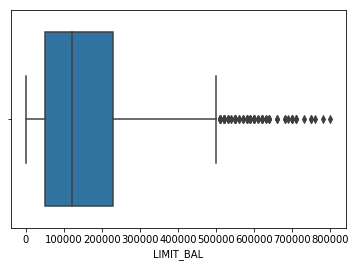

In [9]:
sns.boxplot(df_train["LIMIT_BAL"])

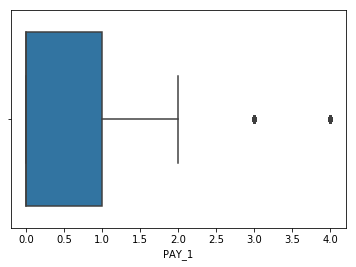

In [10]:
sns.boxplot(df_train["PAY_1"])

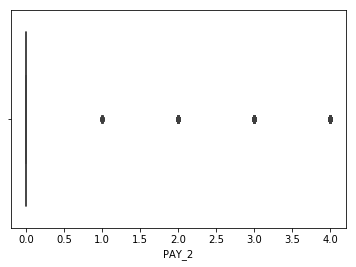

In [11]:
sns.boxplot(df_train["PAY_2"])

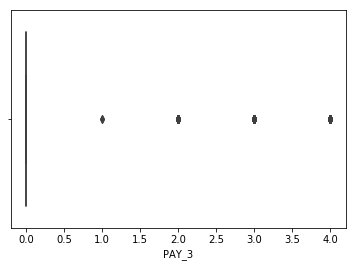

In [12]:
sns.boxplot(df_train["PAY_3"])

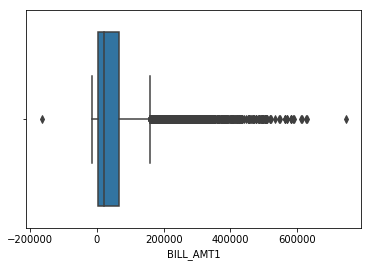

In [13]:
sns.boxplot(df_train["BILL_AMT1"])

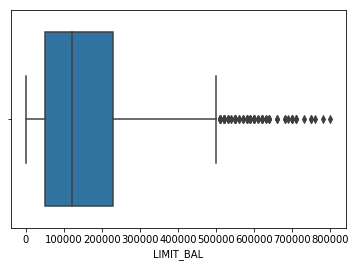

In [14]:
sns.boxplot(df_train['LIMIT_BAL'])

# Drop columns and split the data train

In [32]:
df_cek = df_train[["LIMIT_BAL","AGE","SEX","EDUCATION","PAY_1","PAY_2","PAY_3","TARGET"]]
df_cek_test = df_test[["LIMIT_BAL","AGE","SEX","EDUCATION","PAY_1","PAY_2","PAY_3"]]

In [16]:
y_trains = df_cek['TARGET']
X_trains = df_cek.drop(columns='TARGET')

In [17]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_trains, y_trains, test_size=0.33, random_state=42)

# Creating models with data train

## 1. k-NN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

             precision    recall  f1-score   support

          0       0.86      0.88      0.87      3318
          1       0.81      0.77      0.79      2169

avg / total       0.84      0.84      0.84      5487

accuracy score:  0.8372516858028066
auc score:  0.8263153660364648


## 2. SVM

In [20]:
from sklearn import svm

clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

             precision    recall  f1-score   support

          0       0.84      0.88      0.86      3318
          1       0.81      0.74      0.78      2169

avg / total       0.83      0.83      0.83      5487

accuracy score:  0.82941498086386
auc score:  0.8147265804443177


## 3. Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [23]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

             precision    recall  f1-score   support

          0       0.84      0.87      0.85      3318
          1       0.79      0.74      0.76      2169

avg / total       0.82      0.82      0.82      5487

accuracy score:  0.8188445416438855
auc score:  0.8059065477128401


## 4. Multinomioal Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
y_pred = naive_bayes.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

             precision    recall  f1-score   support

          0       0.76      0.57      0.65      3318
          1       0.52      0.72      0.60      2169

avg / total       0.66      0.63      0.63      5487

accuracy score:  0.6273008930198651
auc score:  0.6433769614083706


## 5. Logistic Regression 

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

             precision    recall  f1-score   support

          0       0.60      1.00      0.75      3318
          1       1.00      0.00      0.00      2169

avg / total       0.76      0.60      0.46      5487

accuracy score:  0.6048842719154365
auc score:  0.5002305209774089


## 6. Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

             precision    recall  f1-score   support

          0       0.86      0.87      0.87      3318
          1       0.80      0.79      0.79      2169

avg / total       0.84      0.84      0.84      5487

accuracy score:  0.8381629305631493
auc score:  0.8293040100645541


## 7. Extra Trees

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

             precision    recall  f1-score   support

          0       0.85      0.87      0.86      3318
          1       0.79      0.76      0.78      2169

avg / total       0.83      0.83      0.83      5487

accuracy score:  0.8264989976307636
auc score:  0.8145506675103817


# Hasil klasifikasi

Dari hasil uji evaluasi, disimpulkan bahawa metode Random Forest memiliki auc score paling tinggi, yaitu sebanyak 0.82. Maka dari itu, dilakukan pemodelan untuk memprediksi datatest

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_trains, y_trains)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
y_pred = clf.predict(df_cek_test)

In [36]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [37]:
df_test['TARGET'] = pd.Series(y_pred)

In [43]:
df_test['TARGET'].value_counts()

0    10270
1     6355
Name: TARGET, dtype: int64

In [44]:
df_test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0


In [45]:
df_test.to_csv("Hasil Testing Credit Scoring.csv")